# Budowa eigenfaces w oparciu o zbiór danych LFW

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

## Ładowanie danych

In [7]:
lfw_people = fetch_lfw_people(min_faces_per_person=50)

Wyświetlmy część zaimportowanych danych

In [22]:
def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
def display_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
    plt.show()

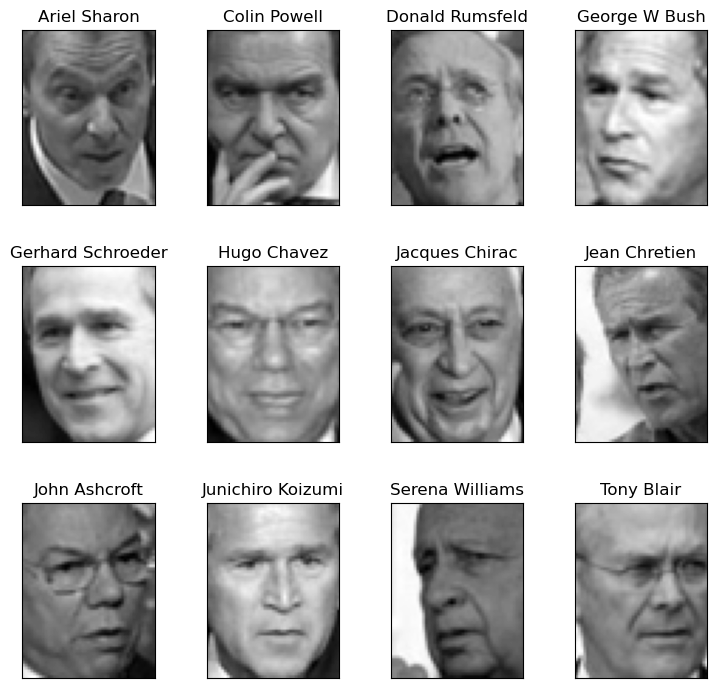

In [23]:
display_gallery(lfw_people.images, lfw_people.target_names)

## Podział na zbiór treningowy i testowy

In [29]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=42)

## PCA

### Trening PCA na zbiorze treningowym

In [53]:
pca = PCA(n_components=100).fit(X_train)

### Redukcja wymiarowości dla zbioru treningowego i testowego

In [31]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Klasyfikacja

### Dla 100 komponentów

#### MLP

In [54]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=lfw_people.target_names)

print(report_mlp)

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.69      0.71        16
     Colin Powell       0.91      0.91      0.91        66
  Donald Rumsfeld       0.63      0.70      0.67        27
    George W Bush       0.89      0.87      0.88       140
Gerhard Schroeder       0.77      0.71      0.74        24
      Hugo Chavez       0.93      0.76      0.84        17
   Jacques Chirac       0.57      0.40      0.47        10
    Jean Chretien       0.58      0.79      0.67        14
    John Ashcroft       0.70      0.88      0.78        16
Junichiro Koizumi       0.83      0.91      0.87        11
  Serena Williams       0.78      0.78      0.78         9
       Tony Blair       0.85      0.82      0.84        40

         accuracy                           0.82       390
        macro avg       0.76      0.77      0.76       390
     weighted avg       0.83      0.82      0.82       390



#### SVM

In [55]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_pca, y_train)

y_pred_svm = svm.predict(X_test_pca)
report_svm = classification_report(y_test, y_pred_svm, target_names=lfw_people.target_names)

print(report_svm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.75      0.77        16
     Colin Powell       0.72      0.92      0.81        66
  Donald Rumsfeld       0.58      0.78      0.67        27
    George W Bush       0.89      0.85      0.87       140
Gerhard Schroeder       0.79      0.79      0.79        24
      Hugo Chavez       1.00      0.65      0.79        17
   Jacques Chirac       1.00      0.60      0.75        10
    Jean Chretien       1.00      0.79      0.88        14
    John Ashcroft       0.93      0.81      0.87        16
Junichiro Koizumi       1.00      0.64      0.78        11
  Serena Williams       0.86      0.67      0.75         9
       Tony Blair       0.88      0.88      0.88        40

         accuracy                           0.82       390
        macro avg       0.87      0.76      0.80       390
     weighted avg       0.84      0.82      0.82       390



### Dla 50 komponentów

Przy redukcji wymiarowości do 50 wymiarów obserwujemy zauważalnie gorsze wyniki niż przy 100 komponentach (wskaźniki precision, recall oraz f1-score spadają w porównaniu do 100 komponentów)

In [60]:
pca = PCA(n_components=50).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MLP

In [61]:
mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=lfw_people.target_names)

print(report_mlp)

                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.69      0.63        16
     Colin Powell       0.86      0.83      0.85        66
  Donald Rumsfeld       0.53      0.63      0.58        27
    George W Bush       0.85      0.84      0.84       140
Gerhard Schroeder       0.56      0.58      0.57        24
      Hugo Chavez       0.60      0.53      0.56        17
   Jacques Chirac       0.67      0.40      0.50        10
    Jean Chretien       0.75      0.64      0.69        14
    John Ashcroft       0.76      0.81      0.79        16
Junichiro Koizumi       0.91      0.91      0.91        11
  Serena Williams       0.78      0.78      0.78         9
       Tony Blair       0.65      0.70      0.67        40

         accuracy                           0.75       390
        macro avg       0.71      0.70      0.70       390
     weighted avg       0.76      0.75      0.75       390



#### SVM

In [62]:
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_pca, y_train)

y_pred_svm = svm.predict(X_test_pca)
report_svm = classification_report(y_test, y_pred_svm, target_names=lfw_people.target_names)

print(report_svm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.46      0.69      0.55        16
     Colin Powell       0.80      0.77      0.78        66
  Donald Rumsfeld       0.55      0.63      0.59        27
    George W Bush       0.88      0.68      0.77       140
Gerhard Schroeder       0.44      0.50      0.47        24
      Hugo Chavez       0.73      0.65      0.69        17
   Jacques Chirac       0.55      0.60      0.57        10
    Jean Chretien       0.79      0.79      0.79        14
    John Ashcroft       0.48      0.88      0.62        16
Junichiro Koizumi       0.75      0.82      0.78        11
  Serena Williams       0.80      0.89      0.84         9
       Tony Blair       0.60      0.68      0.64        40

         accuracy                           0.70       390
        macro avg       0.65      0.71      0.67       390
     weighted avg       0.73      0.70      0.70       390



### Wybór optymalnej liczby komponentów w oparciu o [scree](https://www.wikiwand.com/en/Scree_plot) plot

Do wybrania optymalnej liczby komponentów wykorzystamy metodę łokcia oraz metodę minimalnego progu kumulatywnej wariancji.

Elbow method: 1169
95.00% variance threshold: 175


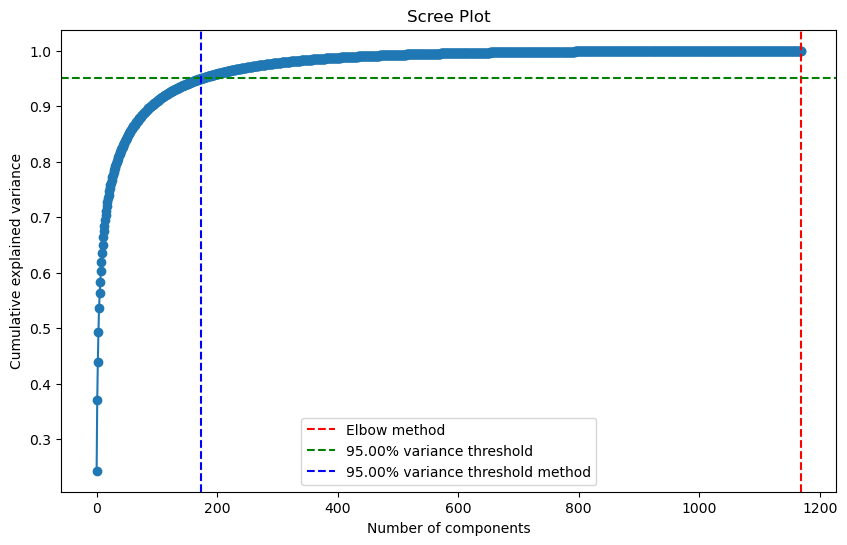

In [66]:
pca_full = PCA()
pca_full.fit(X_train)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Elbow method
gradients = np.diff(cumulative_variance)
optimal_components_elbow = np.argmin(gradients) + 1  # add 1, because of zero-based indexing

# Set cumulative variance threshold method
threshold = 0.95
optimal_components_threshold = np.where(cumulative_variance >= threshold)[0][0] + 1

# Wyniki
print('Elbow method:', optimal_components_elbow)
print(f'{threshold * 100:.2f}% variance threshold:', optimal_components_threshold)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.axvline(x=optimal_components_elbow - 1, color='r', linestyle='--', label='Elbow method')
plt.axhline(y=threshold, color='g', linestyle='--', label=f'{threshold * 100:.2f}% variance threshold')
plt.axvline(x=optimal_components_threshold - 1, color='b', linestyle='--', label=f'{threshold * 100:.2f}% variance threshold method')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

### Metoda 